# Player Performance Assessment


Can you predict the rating of a football player in a given match as a function of physical, contextual, kinematical, technical, and tactical data-related player, his team, and the opponent for FC Sevilla and FC Bengaluru United?


Can you connect human perception of a player´s performance to the fundamental actions that such a player carries out on the pitch?




# Introduction and Context


Nowadays, large sets of data offer a deep description of both players and team actions during matches. Information contained in such datasets ranges from physical and kinematic variables to complex game-related technical and tactical metrics. Nevertheless, and despite the emergence of such rich and precise datasets, the main open problem keeps being the identification of the key actions that make outstanding the performance of players in the whole spectrum of roles and positions. In this competition, you will use Sevilla FC and FC Bengaluru United's large scouting datasets to relate human-based player evaluations to physical, contextual, kinematic, technical, and tactical variables of players, teams, and opponents. You will produce an algorithm that will be able to decompose the performance of the players into its main fundamental components.




# Objective

The main goal of the problem is to develop a machine learning algorithm that predicts the scout-made evaluation of players in the context of given matches.



# About Dataset

You are provided the Sevilla FC and FC Bengaluru United large scouting dataset containing the players, teams, and opponent's performance in terms of physical, kinematical, technical, and tactical variables.

Every row of the dataset corresponds to the evaluation of a player in a given match together with variables related to the player, match, team, and opponent and the rating of a player in a match given by a scout.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.metrics import r2_score



from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Train Data
data = pd.read_csv(r"C:\Users\Sasidharan\Desktop\Data Science Projects\Football Hackathon\train.csv")

# Prediction Set Data
prediction_set = pd.read_csv(r"C:\Users\Sasidharan\Desktop\Data Science Projects\Football Hackathon\test.csv")

# Feature Description


1. row_id  - (unique identifier of a row)
2. scout_id (categorical) - Unique identifier of a scout
3. winner (categorical) - Player’s team result: winner, loser, or draw
4. team (categorical) - Team of the player: Team1 or Team2 
5. team1_system_id (categorical) - Unique Id of Team 1
6. team2_system_id (categorical) - Unique Id of Team 2
7. competitionId (categorical) - Competition id of the match
8. player_position_1 (categorical) - Position 1 of a player in a match
9. player_position_2 (categorical) - Position 2 of a player in a match
10. player_height - Transformed height of a player
11. player_weight - Transformed weight of a player
12. Player Encoded Variables - Pre encoded variables of a player related to offensive, defensive, positional, physical, general, and other
13. Team 1 Encoded Variables - Pre encoded variables of Team 1 related to offensive, defensive and other 
14. Team 2 Encoded Variables - Pre encoded variables of Team 2 related to offensive, defensive and other 
15. rating_num - Rating of a player in a match given by a scout

# Variables that encode player properties or performance are grouped according to the following scheme:

player_(offensive/defensive/positional/physical/general/other)_(derived/raw/ratio)_var_#number

- player shows if the variable refers to a player property
- (offensive/defensive/positional/physical/general/other) refers to the nature of the variable
- (derived/raw/ratio):
raw: variable empirically measured,
derived: variable defined based on two or more variables and not empirically measured,
ratio: variable defined as a ratio of two raw variables


# Variables that encode team properties or performance are grouped according to the following scheme:  

team(1/2)_(offensive/defensive/other)_(derived/raw/ratio)_var_#number

- team(1/2) shows if the variable refers to a team1 or team2 property
- (offensive/defensive/other) refers to the nature of the variable
- derived/raw/ratio):
raw: variable empirically measured,
derived: variable defined based on two or more variables and not empirically measured,
ratio: variable defined as a ratio of two raw variables


In [3]:
data[["row_id","scout_id","winner","team",'team1_system_id',"team2_system_id","competitionId","player_position_1","player_position_2"]] = data[["row_id","scout_id","winner","team",'team1_system_id',"team2_system_id","competitionId","player_position_1","player_position_2"]].astype('category')

In [4]:
data.shape

(20453, 800)

In [5]:
pd.set_option('display.max_columns',None)
data.head()

,row_id,scout_id,rating_num,winner,team,competitionId,player_position_1,player_position_2,player_height,player_weight,player_general_var_0,player_general_var_1,player_general_var_2,player_general_var_3,player_general_var_4,player_general_var_5,player_positional_raw_var_0,player_positional_raw_var_1,player_positional_raw_var_2,player_positional_raw_var_3,player_defensive_raw_var_4,player_defensive_raw_var_5,player_other_raw_var_6,player_offensive_raw_var_7,player_other_raw_var_8,player_other_raw_var_9,player_other_raw_var_10,player_offensive_raw_var_11,player_other_raw_var_12,player_other_raw_var_13,player_other_raw_var_14,player_positional_raw_var_15,player_positional_raw_var_16,player_positional_raw_var_17,player_other_raw_var_18,player_other_raw_var_19,player_other_raw_var_20,player_positional_raw_var_21,player_positional_raw_var_22,player_positional_raw_var_23,player_other_raw_var_24,player_other_raw_var_25,player_other_raw_var_26,player_other_raw_var_27,player_other_raw_var_28,player_other_raw_var_29,player_other_raw_var_30,player_offensive_raw_var_31,player_offensive_raw_var_32,player_other_raw_var_33,player_other_raw_var_34,player_other_raw_var_35,player_other_raw_var_36,player_other_raw_var_37,player_other_raw_var_38,player_other_raw_var_39,player_other_raw_var_40,player_other_raw_var_41,player_defensive_raw_var_42,player_defensive_raw_var_43,player_other_raw_var_44,player_other_raw_var_45,player_offensive_raw_var_46,player_other_raw_var_47,player_defensive_raw_var_48,player_offensive_raw_var_49,player_offensive_raw_var_50,player_other_raw_var_51,player_defensive_raw_var_52,player_offensive_raw_var_53,player_other_raw_var_54,player_positional_raw_var_55,player_other_raw_var_56,player_other_raw_var_57,player_other_raw_var_58,player_other_raw_var_59,player_offensive_raw_var_60,player_defensive_raw_var_61,player_defensive_raw_var_62,player_other_raw_var_63,player_other_raw_var_64,player_defensive_raw_var_65,player_defensive_raw_var_66,player_defensive_raw_var_67,player_other_raw_var_68,player_other_raw_var_69,player_defensive_raw_var_70,player_general_raw_var_71,player_general_raw_var_72,player_offensive_raw_var_73,player_defensive_raw_var_74,player_other_raw_var_75,player_other_raw_var_76,player_offensive_raw_var_77,player_general_raw_var_78,player_offensive_raw_var_79,player_other_raw_var_80,player_other_raw_var_81,player_other_raw_var_82,player_other_raw_var_83,player_other_raw_var_84,player_other_raw_var_85,player_positional_raw_var_86,player_offensive_raw_var_87,player_other_raw_var_88,player_other_raw_var_89,player_other_raw_var_90,player_other_raw_var_91,player_defensive_raw_var_92,player_defensive_raw_var_93,player_defensive_raw_var_94,player_defensive_raw_var_95,player_other_raw_var_96,player_defensive_raw_var_97,player_other_raw_var_98,player_other_raw_var_99,player_defensive_raw_var_100,player_other_raw_var_101,player_offensive_raw_var_102,player_other_raw_var_103,player_other_raw_var_104,player_offensive_raw_var_105,player_other_raw_var_106,player_other_raw_var_107,player_other_raw_var_108,player_other_raw_var_109,player_positional_raw_var_110,player_other_raw_var_111,player_other_raw_var_112,player_other_raw_var_113,player_general_raw_var_114,player_offensive_raw_var_115,player_offensive_raw_var_116,player_other_raw_var_117,player_other_raw_var_118,player_other_raw_var_119,player_offensive_raw_var_120,player_other_raw_var_121,player_offensive_raw_var_122,player_other_raw_var_123,player_other_raw_var_124,player_other_raw_var_125,player_offensive_raw_var_126,player_other_raw_var_127,player_other_raw_var_128,player_offensive_raw_var_129,player_offensive_raw_var_130,player_offensive_raw_var_131,player_other_raw_var_132,player_offensive_raw_var_133,player_other_raw_var_134,player_other_raw_var_135,player_other_raw_var_136,player_defensive_raw_var_137,player_offensive_raw_var_138,player_other_raw_var_139,player_other_raw_var_140,player_other_raw_var_141,player_other_raw_var_142,player_general_raw_var_143,player_othe

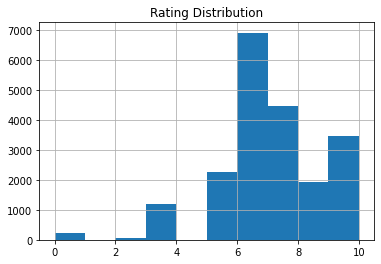

In [6]:
data["rating_num"].hist().set_title("Rating Distribution")
plt.show()

In [7]:
# Seperate data blocks to make it easier to analyze them;

player_data = data.filter(regex='player')
team1_data = data.filter(regex='team1')
team2_data = data.filter(regex='team2')

In [8]:
player_data = player_data.join(data["rating_num"])
team1_data = team1_data.join(data["rating_num"])
team2_data = team2_data.join(data["rating_num"])

In [9]:
player_corr = player_data.corr()
team1_corr = team1_data.corr()
team2_corr = team2_data.corr()

# Create Train and Test Dataset;

# Setting a threshold;
data.dropna(axis=0,thresh = 0.7*data.shape[1], inplace=True)

In [10]:
# Split data available into training and test data for model evaluation purposes;

copy = data.copy()

y = copy.pop("rating_num")
x = copy

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
x_train

row_id scout_id  winner   team competitionId player_position_1  \
20190  28805       13  winner  team1             8              12.0   
1748    2407       13  winner  team1             7               9.0   
10969  15160       16  winner  team1             7              17.0   
9102   12549       12  winner  team2             7              12.0   
5309    7324       13    draw  team1             8               9.0   
...      ...      ...     ...    ...           ...               ...   
11284  15596       11  winner  team1            11               8.0   
11964  16547       15    draw  team1             7              11.0   
5390    7431        1  winner  team1             8               3.0   
860     1173        3    draw  team2             5               4.0   
15795  22064       16   loser  team2            11              16.0   

      player_position_2  player_height  player_weight  player_general_var_0  \
20190              12.0       0.195122           0.42                   0.0   
1748                9.0       0.243902           0.26                   0.0   
10969              17.0       0.536585           0.56                   0.0   
9102               12.0       0.536585           0.40                   0.0   
5309                9.0       0.292683           0.38                   0.0   
...                 ...            ...            ...                   ...   
11284               8.0       0.487805           0.44                   0.0   
11964              11.0       0.609756           0.58                   0.0   
5390                3.0       0.463415           0.64                   0.0   
860                 4.0       0.609756           0.42                   0.0   
15795              16.0       0.658537           0.48                   0.0   

       player_general_var_1  player_general_var_2  player_general_var_3  \
20190                     0                   0.0                   0.0   
1748                      0                   0.0                   0.0   
10969                     0                   0.0                   0.0   
9102                      0                   0.0                   0.0   
5309                      0                   0.0                   0.0   
...                     ...                   ...                   ...   
11284                     0                   0.0                   0.0   
11964                     0                   0.0                   0.0   
5390                      0                   0.0                   0.0   
860                       0                   0.0                   0.0   
15795                     0                   0.0                   0.0   

       player_general_var_4  player_general_var_5  \
20190              0.237705                  0.00   
1748               0.073770                  0.25   
10969              0.000000                  0.00   
9102               0.163934                  0.00   
5309               0.319672                  0.00   
...                     ...                   ...   
11284              0.024590                  0.00   
11964              0.139344                  0.00   
5390               0.114754                  0.25   
860                0.032787                  0.00   
15795              0.147541                  0.00   

       player_positional_raw_var_0  player_positional_raw_var_1  \
20190                          0.0                          0.0   
1748                           0.0                          0.0   
10969                          0.0                          0.0   
9102                           0.0                          0.0   
5309                           0.0                          0.0   
...                            ...                          ...   
11284                          0.0                          0.0   
11964                          0.0                          0.0   
5390                           0.0                 

In [12]:
train = x_train.join(y_train, how = "inner")

In [13]:
test = x_test.join(y_test)

In [14]:
test

row_id scout_id  winner   team competitionId player_position_1  \
16834  23575       16  winner  team1             6               3.0   
385      514       19   loser  team1             7              13.0   
18643  26331       12   loser  team1             8               1.0   
3211    4399       12    draw  team2             8              13.0   
20325  29023       12  winner  team2             8               1.0   
...      ...      ...     ...    ...           ...               ...   
18061  25429       15    draw  team2             7               1.0   
8944   12318        2    draw  team1             4              17.0   
13940  19383       11  winner  team2            11               9.0   
2619    3559       16    draw  team1             7               6.0   
18366  25892       11   loser  team1             5               2.0   

      player_position_2  player_height  player_weight  player_general_var_0  \
16834               3.0       0.560976           0.64                   0.0   
385                13.0       0.317073           0.40                   0.0   
18643               1.0       0.682927           0.68                   0.0   
3211               13.0       0.390244           0.46                   0.0   
20325               1.0       0.536585           0.42                   0.0   
...                 ...            ...            ...                   ...   
18061               1.0       0.609756           0.62                   0.0   
8944               17.0       0.634146           0.68                   0.0   
13940               9.0       0.658537           0.56                   0.4   
2619                6.0       0.463415           0.40                   0.2   
18366               2.0       0.512195           0.50                   0.0   

       player_general_var_1  player_general_var_2  player_general_var_3  \
16834                     0              0.000000                   0.0   
385                       0              0.000000                   0.0   
18643                     0              0.000000                   0.0   
3211                      0              0.000000                   0.0   
20325                     0              0.794118                   0.0   
...                     ...                   ...                   ...   
18061                     0              0.745098                   0.0   
8944                      0              0.892157                   0.0   
13940                     0              0.000000                   0.0   
2619                      0              0.401961                   0.0   
18366                     0              0.000000                   0.0   

       player_general_var_4  player_general_var_5  \
16834              0.180328                   0.0   
385                0.081967                   0.0   
18643              0.295082                   0.0   
3211               0.049180                   0.0   
20325              0.024590                   0.0   
...                     ...                   ...   
18061              0.008197                   0.0   
8944               0.098361                   0.0   
13940              0.073770                   0.0   
2619               0.073770                   0.0   
18366              0.008197                   0.0   

       player_positional_raw_var_0  player_positional_raw_var_1  \
16834                          0.0                          0.0   
385                            0.0                          0.0   
18643                          0.0                          0.0   
3211                           0.0                          0.0   
20325                          0.0                          0.0   
...                            ...                          ...   
18061                          0.0                          0.0   
8944                           0.0                          0.0   
13940                          0.0                 

In [15]:
prediction_set["rating_num"] = 0

# Missing Value Treatment

In [16]:
missing = train.isnull().sum().sort_values(ascending=False)

In [17]:
# Missing a : Columns missing greater than 70 % of their values;
# Missing b : Columns missing lesser than 70 % of their values;
missing_a = []
missing_b = []
for col in train.columns:
    if missing[col] / train.shape[0] >= 0.7:
        missing_a.append(col)
    else:
        missing_b.append(col)

In [18]:
# Drop columns missing 70 % or more of their values;

train.drop(columns=missing_a, inplace=True)
test.drop(columns=missing_a, inplace=True)
prediction_set.drop(columns=missing_a, inplace=True)

In [19]:
categorical = train.select_dtypes(['category']).columns
num_missing =[col for col in missing_b if col not in categorical]
cat_missing = [col for col in missing_b if col in categorical]

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [21]:
imputer.fit(train[num_missing])

SimpleImputer()

In [22]:
train[num_missing] = imputer.transform(train[num_missing])
test[num_missing] = imputer.transform(test[num_missing])
prediction_set[num_missing] = imputer.transform(prediction_set[num_missing])

In [23]:
# Categorical Columns
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imp.fit(train[cat_missing])

SimpleImputer(strategy='most_frequent')

In [24]:
train[cat_missing] = imp.fit_transform(train[cat_missing])
test[cat_missing] = imp.transform(test[cat_missing])
prediction_set[cat_missing] = imp.transform(prediction_set[cat_missing])

# Encoding Categorical Variables

In [25]:
categorical = categorical.tolist()

In [26]:
categorical.remove("row_id")

In [27]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(dtype='int64', sparse=False, handle_unknown = 'ignore')

train_enc = pd.DataFrame(encoder.fit_transform(train[categorical]), index = train.index )
test_enc = pd.DataFrame(encoder.transform(test[categorical]), index = test.index)
ps_enc = pd.DataFrame(encoder.transform(prediction_set[categorical]), index = prediction_set.index)

In [28]:
train.drop(columns=categorical,inplace=True)
test.drop(columns=categorical,inplace=True)
prediction_set.drop(columns=categorical,inplace=True)

train = train.join(train_enc, how = 'inner')
test = test.join(test_enc, how = 'inner')
prediction_set = prediction_set.join(ps_enc, how = 'inner')

# Modeling Building and HyperParameter Tuning

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 

In [30]:
y_train = train["rating_num"]
x_train = train.drop(columns = ["row_id","rating_num"])

y_actual = test["rating_num"]
x_test = test.drop(columns = ["row_id","rating_num"])

In [31]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
r2 = cross_val_score(model,x_train,y_train,cv=5,scoring="r2")

In [33]:
print("Cross Validation Score before Tuning Parameters:", r2.mean())

Cross Validation Score before Tuning Parameters: 0.25945263631531745


In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [36]:
# Parameters to try for model optimization:

n_estimators = [100,200,500,1000]
max_depth = [4,6,8]
learning_rate = [0.05, 0.1, 0.15, 0.2, 0.3]
min_child_weight = [1,2,3,4]
reg_alpha = [0,0.5,1]
reg_lambda = [0,0.5,1]

hyperparameter = {'n_estimators' : n_estimators,
                 'max_depth' : max_depth,
                 'learning_rate' : learning_rate,
                 'min_child_weight' : min_child_weight,
                 'reg_alpha' : reg_alpha,
                 'reg_lambda': reg_lambda}

In [37]:
random_cv = RandomizedSearchCV(estimator = model, param_distributions = hyperparameter, cv = 5,
                              n_iter = 10, scoring = 'r2', n_jobs = 5,
                              verbose = 5, return_train_score = True, random_state = 42)

In [38]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_bin=256, m...
                                          n_estimators=100, n_jobs=0,
                                          num_parallel_tree=1, predictor='auto

In [39]:
random_cv.best_score_

0.3458997513777984

In [40]:
random_cv.best_params_

{'reg_lambda': 1,
 'reg_alpha': 0.5,
 'n_estimators': 1000,
 'min_child_weight': 4,
 'max_depth': 8,
 'learning_rate': 0.1}

In [41]:
# Updating model with new parameters

model_updated= XGBRegressor(n_estimators=1000, min_child_weight=4,max_depth=8,reg_alpha=0.5,reg_lambda=1,learning_rate=0.1)
model_updated.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, ...)

In [49]:
# Perfomance on test data;

y_predicted = model_updated.predict(x_test)
y_predicted = np.round(y_predicted*2)/2

In [51]:
score = r2_score(y_actual,y_predicted)

In [60]:
print("Model Coefficient of Determination:", score)

Model Coefficient of Determination: 0.3896750958070171


***